In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

# Lecture 09

#

In [27]:
# Lets import some libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
%matplotlib inline


In [44]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random 

TEST_SIZE = 0.2


CMAP = plt.cm.brg
# plt.rcParams.update(params);
# plt.set_cmap(CMAP);

plt.style.use('bmh')
    
EPOCHS = 20000 # number of epochs
ALPHA = 0.1 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2


In [45]:
# Function to plot history

def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2, figsize = (15, 6))
    
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.4, edgecolor = 'b')
    
    ax = axes[0]
    
    hist_df.plot(y = [hist_df.columns[0], hist_df.columns[2]], ax = ax, colormap=CMAP)
    
    lossmin = hist_df[hist_df.columns[0]].min()
    
    testmin = hist_df[hist_df.columns[2]].min()
    
    fmtStr = "Min {}: \n Testing : {:7.4f}\n Testing  : {:7.4f}"
    
    txtstr = fmtStr.format(hist_df.columns[0], lossmin, testmin) # test to plot
    
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel("Epochs")
    
    ax.set_ylabel(hist_df.columns[0].capitalize())
    
    ax = axes[1]
    
    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap = CMAP)
    
    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    
    testmin = hist_df[hist_df.columns[3]].max()
    
    fmtStr = "Max {}: \n Training : {:7.4f}\n Testing  : {:7.4f}"
    txtstr = fmtStr.format(hist_df.columns[1], accmin, testmin) # text to plot
    
    ax.text(0.4, 0.5, txtstr, transform = ax.transAxes, fontsize = 14, verticalalignment='top', bbox=props)
    
    ax.set_label("Epochs")
    
    ax.set_ylabel(hist_df.columns[1].capitalize())
    
    plt.tight_layout()
        

# Generate Data Set

#### Use sklearn dataset generate code

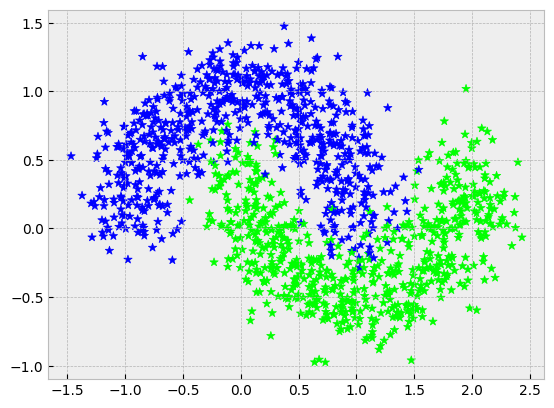

In [46]:
X, y = datasets.make_moons(n_samples = NUM_SAMPLES, shuffle = True, noise = NOISE, random_state=RANDOM_STATE)

# Lets Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, marker='*', cmap = CMAP);